In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd



#--------function to get path of the symbol---------------------
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


#------------------reads csv-----------------------------------
def get_data(symbollist, dates):
    df_final=pd.DataFrame(index=dates)
    if "SPY" not in symbollist:
        symbollist.insert(0,"SPY")
    for symbol in symbollist:
        file_path=symbol_to_path(symbol)
        df_temp=pd.read_csv(file_path,parse_dates=True,
                            index_col="Date",
                            usecols=["Date", "Adj Close"])
        df_temp=df_temp.rename(columns={'Adj Close':symbol})
        df_final=df_final.join(df_temp)
        if symbol == "SPY":
            df_final=df_final.dropna(subset=['SPY'])
    return df_final


#------------------plot function------------------------------
def plot(df_data):
    ax=df_data.plot(title="Incomplete Data",fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

if __name__ == '__main__':
    #list of symbols
    symbollist=["PSX","FAKE1","FAKE2"]
    #symbollist=["FAKE2"]
    #date range
    start_date='2005-12-31'
    end_date='2014-12-07'
    #create date range
    idx=pd.date_range(start_date,end_date)
    #get adjusted close of each symbol
    df_data=get_data(symbollist,idx)
    #-----------------------forward fill missing values----------------
    df_data.fillna(method="ffill",inplace="True")
    plot(df_data)


ValueError: For argument "inplace" expected type bool, received type str.

## To Do: Forward and Backward filling on multiple stocks

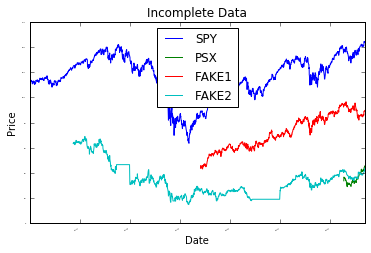

In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#--------function to get path of the symbol---------------------
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


#------------------reads csv-----------------------------------
def get_data(symbollist, dates):
    df_final=pd.DataFrame(index=dates)
    if "SPY" not in symbollist:
        symbollist.insert(0,"SPY")
    for symbol in symbollist:
        file_path=symbol_to_path(symbol)
        df_temp=pd.read_csv(file_path,parse_dates=True,index_col="Date",usecols=["Date", "Adj Close"])
        df_temp=df_temp.rename(columns={'Adj Close':symbol})
        df_final=df_final.join(df_temp)
        if symbol == "SPY":
            df_final=df_final.dropna(subset=['SPY'])
    return df_final


#------------------plot function------------------------------
def plot(df_data):
    ax=df_data.plot(title="Incomplete Data",fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

if __name__ == '__main__':
    #list of symbols
    symbollist=["PSX","FAKE1","FAKE2"]
     
    #date range
    start_date='2005-12-31'
    end_date='2014-12-07'
    #create date range
    idx=pd.date_range(start_date,end_date)
    #get adjusted close of each symbol
    df_data=get_data(symbollist,idx)
    #-----------------------forward fill missing values----------------
    df_data.fillna(method="ffill",inplace="True")
    plot(df_data)


## Completed: Forward and Backward filling on multiple stocks

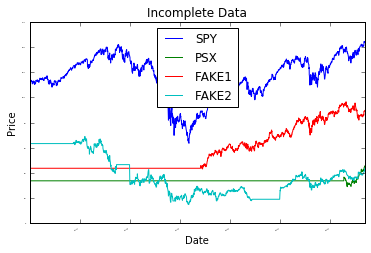

In [16]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


#--------function to get path of the symbol---------------------
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


#------------------reads csv-----------------------------------
def get_data(symbollist, dates):
    df_final=pd.DataFrame(index=dates)
    if "SPY" not in symbollist:
        symbollist.insert(0,"SPY")
    for symbol in symbollist:
        file_path=symbol_to_path(symbol)
        df_temp=pd.read_csv(file_path,parse_dates=True,index_col="Date",usecols=["Date", "Adj Close"])
        df_temp=df_temp.rename(columns={'Adj Close':symbol})
        df_final=df_final.join(df_temp)
        if symbol == "SPY":
            df_final=df_final.dropna(subset=['SPY'])
    return df_final


#------------------plot function------------------------------
def plot(df_data):
    ax=df_data.plot(title="Incomplete Data",fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

if __name__ == '__main__':
    #list of symbols
    symbollist=["PSX","FAKE1","FAKE2"]
     
    #date range
    start_date='2005-12-31'
    end_date='2014-12-07'
    #create date range
    idx=pd.date_range(start_date,end_date)
    #get adjusted close of each symbol
    df_data=get_data(symbollist,idx)
    #-----------------------forward fill missing values----------------
    df_data.fillna(method="ffill",inplace="True")
    df_data.fillna(method="bfill",inplace="True")
    plot(df_data)


##  TEST -  Fill Missing Values

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def fill_missing_values(df_data):
    """Fill missing values in data frame, in place"""
    
 
def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbollist, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df_final=pd.DataFrame(index=dates)
    if "SPY" not in symbollist:    #add SPY for reference, if absent
        symbollist.insert(0,"SPY")
        
    for symbol in symbollist:
        file_path=symbol_to_path(symbol)
        df_temp=pd.read_csv(file_path,parse_dates=True,
                            index_col="Date",
                            usecols=["Date", "Adj Close"],
                           na_values=["nan"])
        df_temp=df_temp.rename(columns={'Adj Close':symbol})
        df_final=df_final.join(df_temp)
        if symbol == "SPY":   # drop dates SPY did not trade
            df_final=df_final.dropna(subset=['SPY'])
    
    return df_final


 
def plot(df_data):
    """Plot stock data with appropriate axis labels."""
    ax=df_data.plot(title="Stock Data",fontsize=2)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()

def test_run():
    """Function called by Test Run."""
    # Read data
    symbollist=["PSX","FAKE1","FAKE2"] #list of symbols
    #date range
    start_date='2005-12-31'
    end_date='2014-12-07'
    dates = pd.date_range(start_date, end_date) # date range as index
    df_data = get_data(symbol_list, dates) #get data for each symbol
    
    #-----------------------forward fill missing values----------------
    fill_missing_values(df_data)
    
    # plot
    plot(df_data)
    
if __name__ == '__main__':
    test_run()

NameError: global name 'symbol_list' is not defined